# Locally Weighted Regression

The core idea of locally weighted regression is to make predictions for a given input $x$ by focusing on nearby points in the data space. The algorithm assigns weights to the cost function for each data point, with points closer to $x$ receiving higher weights and points farther away receiving weights approaching zero.

In a standard linear regression problem, we solve the following cost function:
$$
\min_\theta \sum_{i}(y^{(i)}-\theta^TX^{(i)})^2
$$
Here, $X$ represents the data matrix, $y$ is the target vector, and $x$ is the specific data point for which we want to make a prediction. To incorporate locally weighted regression, we introduce weights into the cost function. The weight for each data point is defined as:
$$
w^{(i)}=\exp(-\frac{(x^{(i)}-x)^2}{2\tau^2})\\
\min_\theta \sum_{i}w^{(i)}(y^{(i)}-\theta^TX^{(i)})^2
$$
This weight is Gaussian-like and ensures that points farther from $x$ contribute less to the prediction. Specifically, if a data point $x^{(i)}$ is far from the prediction point $x$, the weight $w^{(i)}$ approaches zero. Conversely, if $x^{(i)}$ is close to $x$, the weight approaches 1.

The use of such weights allows locally weighted regression to effectively account for the influence of nearby data points while minimizing the contribution of distant ones.

The parameter $\tau$ controls how quickly the weight of a training example decreases as the distance between its $x^{(i)}$ and the query point $x$ increases. Choosing an appropriate value for $\tau$ is a complex task and often depends on the specific dataset.

Additionally, locally weighted regression, like the KNN method, has limitations. It tends to perform poorly in high-dimensional feature spaces due to the curse of dimensionality, and it may struggle when the dataset contains too few data points, as there may not be enough nearby examples to provide meaningful predictions.

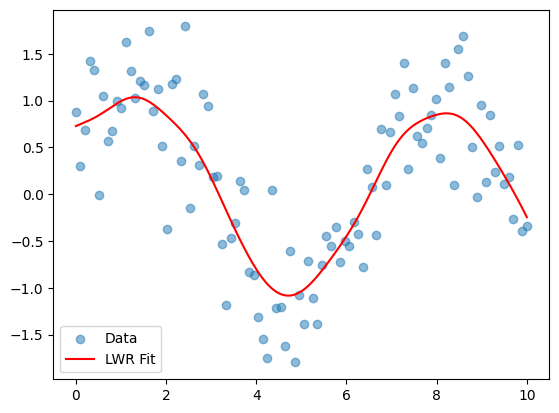

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian_weights(x, x0, tau):
    return np.exp(-((x - x0) ** 2) / (2 * tau ** 2))

def locally_weighted_regression(x, y, x0, tau):
    weights = gaussian_weights(x, x0, tau)
    X = np.vstack([np.ones(len(x)), x]).T
    W = np.diag(weights)
    theta = np.linalg.pinv(X.T @ W @ X) @ X.T @ W @ y
    return theta[0] + theta[1] * x0

# Generate some sample data
np.random.seed(0)
x = np.linspace(0, 10, 100)
y = np.sin(x) + np.random.normal(scale=0.5, size=x.shape)

# Apply locally weighted regression
tau = 0.5  # Bandwidth parameter
x_smooth = np.linspace(0, 10, 200)
y_smooth = [locally_weighted_regression(x, y, xi, tau) for xi in x_smooth]

# Plot the results
plt.scatter(x, y, label='Data', alpha=0.5)
plt.plot(x_smooth, y_smooth, color='red', label='LWR Fit')
plt.legend()
plt.show()
